# Pytorch Computer Vision


#### Main libraries to look onto

| **PyTorch Module**                 | **What Does It Do?**                                                                                                                                          |
|-----------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `torchvision`                     | Contains datasets, model architectures, and image transformations often used for computer vision problems.                                                   |
| `torchvision.datasets`           | Includes many example computer vision datasets for tasks like image classification, object detection, video classification, etc. Also includes base classes for custom datasets. |
| `torchvision.models`             | Provides prebuilt, commonly used model architectures (e.g., ResNet, VGG) that can be used or fine-tuned for your own tasks.                                   |
| `torchvision.transforms`         | Provides image transformation functions (like resizing, normalization, data augmentation) to preprocess images for training/testing.                          |
| `torch.utils.data.Dataset`       | Base class for all PyTorch datasets. You subclass this to define custom datasets.                                                                             |
| `torch.utils.data.DataLoader`    | Creates an efficient Python iterable (with batching, shuffling, etc.) over a dataset defined using `Dataset`.                                                 |


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

torch.__version__,torchvision.__version__

('2.6.0+cu118', '0.21.0+cu118')

### Lets's setup the training data

We are using the FashionMNIST dataset from torchvision.datasets

In [2]:
# Download the data

train_data = datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform= torchvision.transforms.ToTensor(),
    target_transform=None
    )

test_data = datasets.FashionMNIST(
    root="data",
    download=True,
    train=False,
    transform=ToTensor(),
    target_transform=None,

)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
image , label = train_data[0]

image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
train_data_classes = train_data.classes
train_data_classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
train_data_class_to_idx = train_data.class_to_idx
train_data_class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

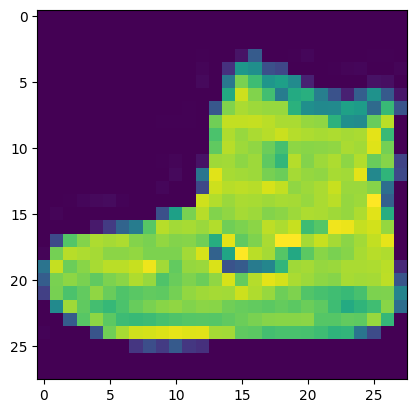

In [7]:
#### Visualize the data

import matplotlib.pyplot as plt

plt.imshow(image.squeeze())

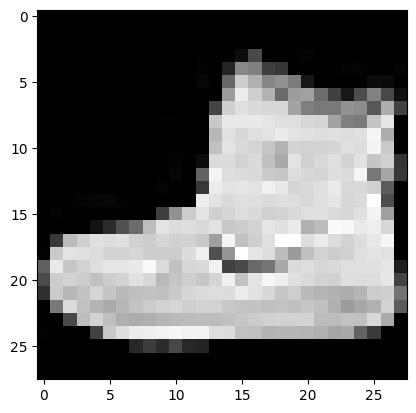

In [8]:
plt.imshow(image.squeeze(),cmap="grey")

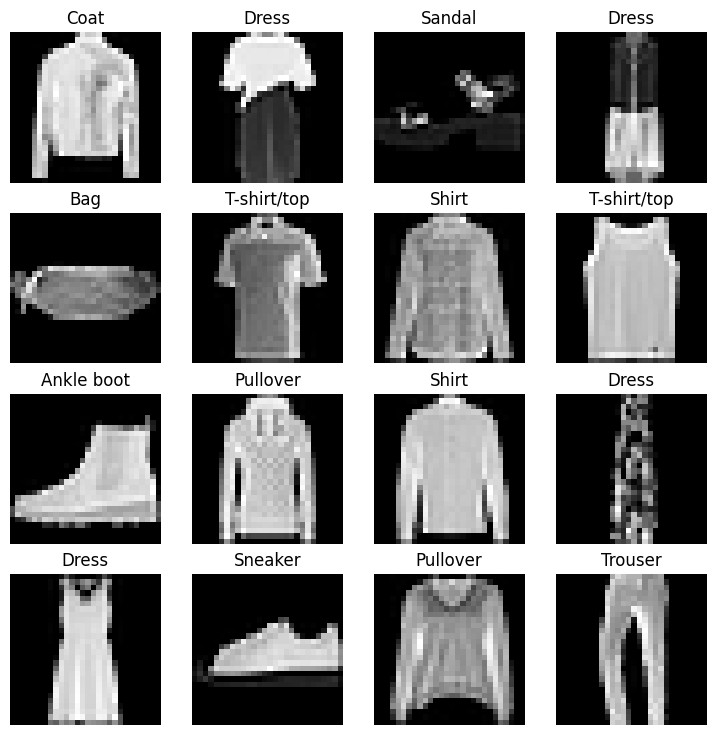

In [9]:
torch.manual_seed(42)
import random

fig = plt.figure(figsize=(9,9))
rows , columns = 4,4
for i in range(1,rows*columns+1):
    random_index = random.randint(0,len(train_data))
    image,label = train_data[random_index]
    fig.add_subplot(rows,columns,i)
    plt.imshow(image.squeeze(),cmap="grey")
    plt.title(train_data_classes[label])
    plt.axis(False)


### 2. Prepare DataLoader (Mini-Batches)

`torch.utils.data.DataLoader` turns a dataset into an iterable of smaller chunks called **batches** or **mini-batches**.

- **Why use it?**
  - More **efficient** than processing all data at once.
  - Enables **mini-batch gradient descent**, which updates the model multiple times per epoch.
  - Reduces memory usage and speeds up training.

- **How to set batch size?**
  - Use the `batch_size` parameter (e.g., 32, 64, 128).
  - Common to use powers of 2.
  - `32` is a good starting point.

DataLoaders are essential for both **training** and **inference** workflows.



In [10]:
from torch.utils.data import DataLoader

train_data_loader = DataLoader(dataset=train_data,
                               batch_size=32,
                               shuffle=True
                               )
test_data_loader = DataLoader(dataset=test_data,
                               batch_size=32,
                               shuffle=False
                               )

train_data_loader,test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x27ac953b0e0>,
 <torch.utils.data.dataloader.DataLoader at 0x27acade0550>)

In [11]:
print(f"The length of Train data loader: {len(train_data_loader)} of the batch size : 32")
print(f"The length of Test data loader : {len(test_data_loader)} of the batch size : 32")
batch = next(iter(train_data_loader))
images , labels = batch
print(images.shape)

The length of Train data loader: 1875 of the batch size : 32
The length of Test data loader : 313 of the batch size : 32
torch.Size([32, 1, 28, 28])


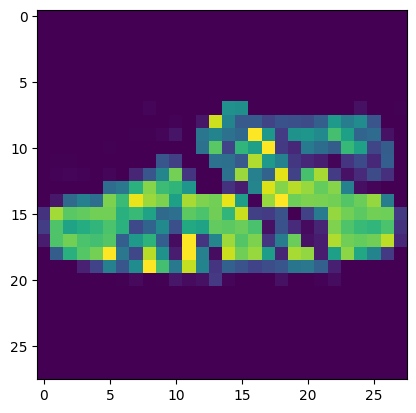

In [12]:
batch_image = images[0]
plt.imshow(batch_image.squeeze())

#### 🔄 Flatten Layer in Neural Networks

##### 📌 What is `Flatten`?

The `Flatten` layer is used in neural networks to **convert multi-dimensional inputs into a 1D vector**. It's typically used when moving from convolutional layers to fully connected (dense) layers.

---

##### 🧱 Why Use `Flatten`?

- Convolutional layers output tensors with shape like `(height, width, channels)`.
- Dense (fully connected) layers expect a 1D input: `(features,)`.
- `Flatten` reshapes the tensor without changing the batch size.

---


In [13]:
class FashionMINIST(nn.Module):
    def __init__(self,
                 input_units,
                 hidden_units,
                 output_units):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_units,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_units)
        )
    def forward(self,x):
        return self.layer_stack(x)


In [14]:
input = 28*28
output = 10 
hidden = 10

model_0 = FashionMINIST(input_units=input,hidden_units=hidden,output_units=output)
model_0

FashionMINIST(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [15]:
dummy_input = batch_image
model_0(dummy_input)

tensor([[-0.0242,  0.2596,  0.5777,  0.1911, -0.2229, -0.2189, -0.1454,  0.2656,
         -0.2845,  0.2090]], grad_fn=<AddmmBackward0>)

### Setting Up loss and optimizer

In [16]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_0.parameters(),lr=0.1)

In [17]:
def print_train_time(start, end, device=None):
    total_time = end - start
    print(f"Training time on {device}: {total_time:.3f} seconds")
    return total_time

### Training and Testing the model

1. Loop through epochs.

2. Loop through training batches, perform training steps, calculate the train loss per batch.

3. Loop through testing batches, perform testing steps, calculate the test loss per batch.

4. Print out what's happening.

5. Time it all (for fun).

In [18]:
import torch

# Use GPU if available, else fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model_0 = model_0.to(device)



Using device: cuda


##### ⏳ `tqdm` – Progress Bars for Python

**`tqdm`** is a Python library that adds a **fast, extensible progress bar** to loops. It helps track the progress of tasks like data processing, downloads, or model training

In [19]:
from tqdm.auto import tqdm
import time

for i in tqdm(range(10)):
    time.sleep(0.1)  # simulate a task


c:\Users\Dell\torch_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 10/10 [00:01<00:00,  9.85it/s]


In [20]:
from torchmetrics import Accuracy
from timeit import default_timer
torch.manual_seed(42)

accuracy = Accuracy(task='multiclass' , num_classes=10).to(device)

train_time_start_on_cpu = default_timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"epoch = {epoch} /--------\n")
    train_loss = 0

    train_acc = 0

    tot_test_loss = 0

    test_acc = 0
    
    for batch , (X,y) in enumerate(train_data_loader):

        X = X.to(device)
        y = y.to(device)

        model_0.train()

        y_logits = model_0(X)
        y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

        loss = loss_fn(y_logits,y)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        train_loss += loss
        
        train_acc += accuracy(y_pred,y)

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_data_loader.dataset)} samples")


    for batch , (X_test , y_test) in enumerate(test_data_loader):

        X_test = X_test.to(device)
        y_test = y_test.to(device)

        model_0.eval()

        with torch.inference_mode():
            y_test_logits = model_0(X_test)
            y_test_pred = torch.softmax(y_test_logits,dim=1).argmax(dim = 1)

            test_loss = loss_fn(y_test_logits,y_test)

        test_acc += accuracy(y_test_pred,y_test)

        tot_test_loss += test_loss
    
    avg_train_loss = train_loss / len(train_data_loader)
    
    avg_accuracy = (train_acc / len(train_data_loader))*100

    avg_test_loss  = tot_test_loss / len(test_data_loader)

    avg_test_acc = (test_acc / len(test_data_loader))*100

    print(f"\nTrain loss: {avg_train_loss:.5f} | Test loss: {avg_test_loss:.5f}, Test acc: {avg_test_acc:.2f}%\n")

train_time_end_on_cpu = default_timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))



        
        

        


  0%|          | 0/3 [00:00<?, ?it/s]

epoch = 0 /--------

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:10<00:21, 10.91s/it]


Train loss: 0.59460 | Test loss: 0.51693, Test acc: 81.91%

epoch = 1 /--------

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:21<00:10, 10.67s/it]


Train loss: 0.48037 | Test loss: 0.48837, Test acc: 82.76%

epoch = 2 /--------

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:31<00:00, 10.64s/it]


Train loss: 0.45758 | Test loss: 0.47873, Test acc: 83.36%

Training time on cuda:0: 31.935 seconds


In [21]:
print(next(model_0.parameters()).device)



cuda:0


In [22]:
from torchmetrics.classification import MulticlassAccuracy

torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    accuracy = MulticlassAccuracy(num_classes=10).to(device)
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:

            X = X.to(device)
            y = y.to(device)
            # Make predictions with the model
            y_pred = model(X)
            
            accuracy_1 = (accuracy(y_pred,y))*100
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_1 # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc.item()}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_data_loader,
    loss_fn=loss_fn)
model_0_results

{'model_name': 'FashionMINIST',
 'model_loss': 0.47873246669769287,
 'model_acc': 82.26616668701172}

In [23]:
!nvidia-smi

Wed Jun 25 19:52:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8              8W /   35W |     165MiB /   4096MiB |     28%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"The device we are using {device}")



The device we are using cuda


### Let's Create a Non Linear Model for Fashion MNIST

In [25]:
# Build a Model

class FashionMNISTv1(nn.Module):
    def __init__(self,
                 input_unit,
                 output_unit,
                 hidden_unit):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_unit,out_features=hidden_unit),
            nn.ReLU(),
            nn.Linear(in_features=hidden_unit,out_features=hidden_unit),
            nn.ReLU(),
            nn.Linear(in_features=hidden_unit,out_features=output_unit)
        )
    def forward(self,x):
        return self.layer_stack(x)
        
    

In [26]:
BATCH_SIZE = 32

batch = next(iter(test_data_loader))

images , labels = batch

shape_of_images = images.shape

print(f"Shape of the input data is {shape_of_images}")



Shape of the input data is torch.Size([32, 1, 28, 28])


In [27]:
input = 28*28
print(f"input : {input}")
output = len(train_data_classes)
print(f"Outputunits: {output}")
hidden = 8
print(f"Hidden units :{hidden}")


model_1 = FashionMNISTv1(input_unit=input,hidden_unit=hidden,output_unit=output)

model_1.to(device)

model_1.state_dict()

input : 784
Outputunits: 10
Hidden units :8


OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0078,  0.0072, -0.0174,  ..., -0.0354,  0.0187,  0.0085],
                      [-0.0182,  0.0344, -0.0162,  ...,  0.0017,  0.0045,  0.0133],
                      [-0.0108, -0.0213,  0.0084,  ...,  0.0273, -0.0081,  0.0026],
                      ...,
                      [ 0.0350, -0.0151, -0.0171,  ...,  0.0005,  0.0119,  0.0352],
                      [-0.0116, -0.0145,  0.0259,  ...,  0.0273, -0.0344,  0.0127],
                      [-0.0325,  0.0155,  0.0087,  ...,  0.0257,  0.0291,  0.0243]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0006,  0.0088,  0.0018, -0.0136, -0.0354, -0.0044,  0.0154,  0.0208],
                     device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[ 0.0841,  0.1612,  0.2213, -0.0684,  0.2309, -0.0074, -0.1252, -0.1373],
                      [-0.2061, -0.2723,  0.0810,  0.3267,  0.0503,  0.0478, -0.1326,

In [28]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_1.parameters(),lr=0.1)

In [29]:
from torchmetrics import Accuracy

accuracy = Accuracy(task='multiclass' , num_classes=10).to(device)

with torch.inference_mode():
    images= images.to(device)
    labels = labels.to(device)
    y_logits = model_1(images)
    y_preds = torch.softmax(y_logits,dim=1).argmax(dim=1)

    loss = loss_fn(y_logits,labels)

    accuracy_x = accuracy(y_preds ,labels)

print(f"Loss :{loss} | accuracy :{accuracy_x*100}")




Loss :2.340871810913086 | accuracy :9.375


In [30]:
from torchmetrics import Accuracy
from timeit import default_timer
torch.manual_seed(42)

accuracy = Accuracy(task='multiclass' , num_classes=10).to(device)

train_time_start_on_cpu = default_timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"epoch = {epoch} /--------\n")
    train_loss = 0

    train_acc = 0

    tot_test_loss = 0

    test_acc = 0
    
    for batch , (X,y) in enumerate(train_data_loader):

        X = X.to(device)
        y = y.to(device)

        model_1.train()

        y_logits = model_1(X)
        y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

        loss = loss_fn(y_logits,y)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        train_loss += loss
        
        train_acc += accuracy(y_pred,y)

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_data_loader.dataset)} samples")


    for batch , (X_test , y_test) in enumerate(test_data_loader):

        X_test = X_test.to(device)
        y_test = y_test.to(device)

        model_1.eval()

        with torch.inference_mode():
            y_test_logits = model_1(X_test)
            y_test_pred = torch.softmax(y_test_logits,dim=1).argmax(dim = 1)

            test_loss = loss_fn(y_test_logits,y_test)

        test_acc += accuracy(y_test_pred,y_test)

        tot_test_loss += test_loss
    
    avg_train_loss = train_loss / len(train_data_loader)
    
    avg_accuracy = (train_acc / len(train_data_loader))*100

    avg_test_loss  = tot_test_loss / len(test_data_loader)

    avg_test_acc = (test_acc / len(test_data_loader))*100

    print(f"\nTrain loss: {avg_train_loss:.5f} | Test loss: {avg_test_loss:.5f}, Test acc: {avg_test_acc:.2f}%\n")

train_time_end_on_cpu = default_timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))



        
        

        


  0%|          | 0/3 [00:00<?, ?it/s]

epoch = 0 /--------

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:11<00:22, 11.04s/it]


Train loss: 0.77433 | Test loss: 0.59434, Test acc: 79.42%

epoch = 1 /--------

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:21<00:10, 10.89s/it]


Train loss: 0.51298 | Test loss: 0.53998, Test acc: 80.51%

epoch = 2 /--------

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:32<00:00, 10.91s/it]


Train loss: 0.47417 | Test loss: 0.51180, Test acc: 82.08%

Training time on cuda:0: 32.743 seconds


In [31]:
model_1_results = eval_model(model_1,test_data_loader,loss_fn)
model_1_results

{'model_name': 'FashionMNISTv1',
 'model_loss': 0.511804461479187,
 'model_acc': 80.8974838256836}

### Lets make the Training and Testing loops as functions

In [32]:
import torchmetrics
def train_loop(epochs,
            model : torch.nn.Module,
            train_data : torch.utils.data.Dataset,
            loss_fn,
            optimizer:torch.optim,
            accuracy : torchmetrics.Accuracy):

    for epoch in tqdm(range(epochs)):
        print(f"epoch = {epoch} /--------\n")
        train_loss = 0

        train_acc = 0
        
        for batch , (X,y) in enumerate(train_data):

            X = X.to(device)
            y = y.to(device)

            model.train()

            y_logits = model(X)
            y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

            loss = loss_fn(y_logits,y)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            train_loss += loss
            
            train_acc += accuracy(y_pred,y)

            if batch % 400 == 0:
                print(f"Looked at {batch * len(X)}/{len(train_data_loader.dataset)} samples")
        train_loss = train_loss/len(train_data)
        train_acc = train_acc/len(train_data)
        print(f"Train Loss :{train_loss} | Train Accuracy :{train_acc*100}")


def test_loop(model : torch.nn.Module,
        test_data : torch.utils.data.Dataset,
        loss_fn,
        accuracy : torchmetrics.Accuracy):

    for epoch in tqdm(range(1)):
        print(f"epoch = {epoch} /--------\n")
        test_loss = 0

        test_acc = 0
        
        for batch , (X,y) in enumerate(test_data):

            X = X.to(device)
            y = y.to(device)

            model.eval()

            y_logits = model(X)
            y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

            loss = loss_fn(y_logits,y)

            test_loss += loss
            
            test_acc += accuracy(y_pred,y)

            if batch % 400 == 0:
                print(f"Looked at {batch * len(X)}/{len(test_data_loader.dataset)} samples")
        test_loss = test_loss/len(test_data)
        test_acc = test_acc/len(test_data)
        print(f"Test Loss :{test_loss} | Test Accuracy :{test_acc*100}")




In [33]:
train_loop(3,model_1,train_data_loader,loss_fn,optimizer,accuracy)
test_loop(model_1,test_data_loader,loss_fn,accuracy)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch = 0 /--------

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:10<00:20, 10.26s/it]

Train Loss :0.4549766778945923 | Train Accuracy :83.70166778564453
epoch = 1 /--------

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:21<00:10, 10.72s/it]

Train Loss :0.4442965090274811 | Train Accuracy :83.98500061035156
epoch = 2 /--------

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:32<00:00, 10.86s/it]


Train Loss :0.43592849373817444 | Train Accuracy :84.34166717529297


  0%|          | 0/1 [00:00<?, ?it/s]

epoch = 0 /--------

Looked at 0/10000 samples


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

Test Loss :0.5072154998779297 | Test Accuracy :82.53793334960938


#### Convolutional Neural network.(Tiny VGG)

In [34]:
# Tiny VGG

class ConvolutionalNN(nn.Module):
    def __init__(self,
                 input_units,
                 hidden_units,
                 output_units):
        super().__init__()
        self.Convolutional_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_units,
                out_channels=hidden_units,
                kernel_size=(3,3),
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3,3),
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2),
                stride=2)
        )
        self.Convolutional_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3,3),
                padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3,3),
                padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )

        self.classification_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,out_features=output_units)
        )
    
    def forward(self,x):
        x = self.Convolutional_1(x)
        x = self.Convolutional_2(x)
        x = self.classification_layer(x)
        return x

In [35]:
model_3 = ConvolutionalNN(1,10,10).to(device)

In [36]:
model_3.state_dict()


OrderedDict([('Convolutional_1.0.weight',
              tensor([[[[-0.1082,  0.2060,  0.0520],
                        [ 0.2693,  0.0364, -0.1051],
                        [ 0.0896, -0.0904,  0.1403]]],
              
              
                      [[[ 0.2976,  0.1927, -0.1457],
                        [ 0.1924,  0.0596,  0.1693],
                        [-0.2032, -0.3300, -0.1288]]],
              
              
                      [[[-0.2557,  0.2735,  0.0960],
                        [ 0.1381,  0.1054, -0.0058],
                        [ 0.2609, -0.2368,  0.0210]]],
              
              
                      [[[-0.2275,  0.1028, -0.1148],
                        [ 0.1021, -0.0694,  0.2765],
                        [-0.1976, -0.1988, -0.1988]]],
              
              
                      [[[ 0.2998,  0.1111,  0.3208],
                        [-0.2751, -0.3306, -0.2608],
                        [-0.2242,  0.1350,  0.1194]]],
              
              
   

In [37]:
torch.cuda.manual_seed(42)
for X,y in test_data_loader:
    X , y = X.to(device) , y.to(device)
    with torch.inference_mode():
        y_logits = model_3(X)
y_logits

tensor([[-0.0456, -0.0482,  0.0092, -0.0863,  0.0347,  0.0485, -0.0798,  0.0452,
         -0.0325, -0.0376],
        [-0.0476, -0.0471,  0.0104, -0.0855,  0.0328,  0.0513, -0.0787,  0.0447,
         -0.0324, -0.0364],
        [-0.0457, -0.0491,  0.0117, -0.0811,  0.0345,  0.0526, -0.0752,  0.0451,
         -0.0320, -0.0368],
        [-0.0482, -0.0454,  0.0076, -0.0879,  0.0349,  0.0519, -0.0767,  0.0466,
         -0.0357, -0.0408],
        [-0.0462, -0.0480,  0.0133, -0.0821,  0.0348,  0.0504, -0.0754,  0.0450,
         -0.0330, -0.0374],
        [-0.0479, -0.0483,  0.0089, -0.0902,  0.0321,  0.0508, -0.0808,  0.0427,
         -0.0349, -0.0371],
        [-0.0507, -0.0499,  0.0048, -0.0898,  0.0334,  0.0474, -0.0797,  0.0446,
         -0.0361, -0.0384],
        [-0.0485, -0.0456,  0.0053, -0.0940,  0.0330,  0.0470, -0.0769,  0.0441,
         -0.0325, -0.0369],
        [-0.0469, -0.0492,  0.0055, -0.0891,  0.0348,  0.0514, -0.0795,  0.0480,
         -0.0329, -0.0382],
        [-0.0475, -

In [38]:
torch.manual_seed(42)

test_batch_image = torch.randn(size=(32,3,64,64))

test_image = test_batch_image[0]

print(f"Test image size :{test_image.shape}")
test_image




Test image size :torch.Size([3, 64, 64])


tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [39]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       stride=1,
                       padding=0,
                       kernel_size=(3,3))

conv_out = conv_layer(test_image)
conv_out.shape

torch.Size([10, 62, 62])

### Let's Try to understand what MaxPool layer does to our code

In [40]:
max_pool_layer = nn.MaxPool2d(kernel_size=(2,2))

print(f"test image size :{test_image.shape}")

test_image_pass_conv = conv_layer(test_image)

print(f"shape of the test image after passing through the conv layer:{test_image_pass_conv.shape}")

test_image_pass_conv_and_maxpool = max_pool_layer(test_image_pass_conv)

print(f"shape of the test image after passing through the conv layer and max pool layer:{test_image_pass_conv_and_maxpool.shape}")

test image size :torch.Size([3, 64, 64])
shape of the test image after passing through the conv layer:torch.Size([10, 62, 62])
shape of the test image after passing through the conv layer and max pool layer:torch.Size([10, 31, 31])


#### Setting Up a Loss function and Optimizer

In [41]:
loss = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_3.parameters(),lr = 0.1)

#### Building a Training and testing loop


for training and testing the CNN we will use the function that we have already created for training and testing.

In [42]:
train_loop(epochs=3,
           model=model_3,
           train_data=train_data_loader,
           loss_fn=loss,
           optimizer=optimizer,
           accuracy=accuracy)
test_loop(model=model_3,
          test_data=test_data_loader,
          loss_fn=loss,
          accuracy=accuracy)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch = 0 /--------

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:13<00:26, 13.02s/it]

Train Loss :0.6371591091156006 | Train Accuracy :76.74000549316406
epoch = 1 /--------

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:25<00:12, 12.49s/it]

Train Loss :0.358084499835968 | Train Accuracy :87.04666137695312
epoch = 2 /--------

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:38<00:00, 12.73s/it]


Train Loss :0.3108416497707367 | Train Accuracy :88.75167083740234


  0%|          | 0/1 [00:00<?, ?it/s]

epoch = 0 /--------

Looked at 0/10000 samples


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

Test Loss :0.35013139247894287 | Test Accuracy :87.56988525390625


In [43]:
model_3_results = eval_model(model=model_3,data_loader=test_data_loader,loss_fn=loss)
model_3_results

{'model_name': 'ConvolutionalNN',
 'model_loss': 0.35013139247894287,
 'model_acc': 86.96601104736328}

In [44]:
import pandas as pd

model_results = pd.DataFrame([model_0_results,model_1_results,model_3_results])
model_results

,model_name,model_loss,model_acc
0,FashionMINIST,0.478732,82.266167
1,FashionMNISTv1,0.511804,80.897484
2,ConvolutionalNN,0.350131,86.966011


Text(0.5, 0, 'accuracy')

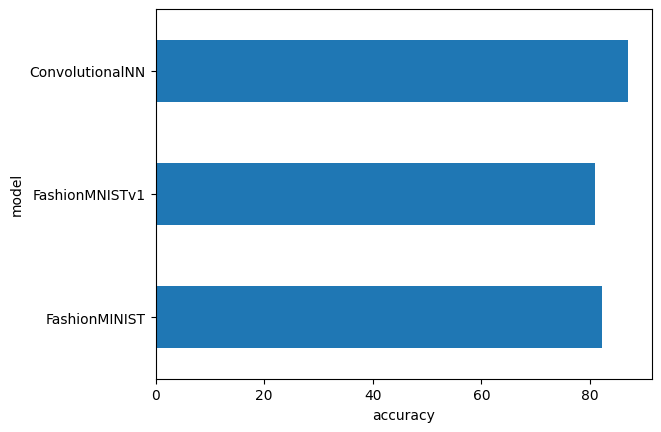

In [45]:
# Let's plot the results in a horizontal bar graph

model_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.ylabel("model")
plt.xlabel("accuracy")

#### Now we have have to make predictions based on the best model

In [46]:
def make_predictions(model: torch.nn.Module,
                     data: list):
    pred_probs = []

    for sample in data:
        sample = sample.unsqueeze(dim=0)
        pred_logits = model(sample)
        pred_prob = torch.softmax(pred_logits,dim=1)
        pred_probs.append(pred_prob)
    return torch.stack(pred_probs,dim=0)


In [47]:
import random
random.seed(42)

test_samples =[]
test_labels=[]

for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)

    

In [48]:
predictions = make_predictions(model=model_3.to("cpu"),data=test_samples)
predictions[:2]

tensor([[[2.6457e-06, 1.5183e-08, 4.7254e-07, 2.5011e-09, 9.1340e-08,
          9.9906e-01, 2.5699e-06, 6.4600e-07, 1.2175e-05, 9.2346e-04]],

        [[7.0516e-03, 9.5798e-01, 1.3458e-04, 2.3903e-02, 4.4915e-03,
          7.0017e-05, 6.1282e-03, 4.2796e-05, 1.7747e-04, 1.8614e-05]]],
       grad_fn=<SliceBackward0>)

In [52]:
argmax_prediction = predictions.argmax(dim=2)
argmax_prediction,test_labels

(tensor([[5],
         [1],
         [7],
         [4],
         [3],
         [0],
         [4],
         [7],
         [1]]),
 [5, 1, 7, 4, 3, 0, 4, 7, 1])

#### Now lets Visualize the predictions

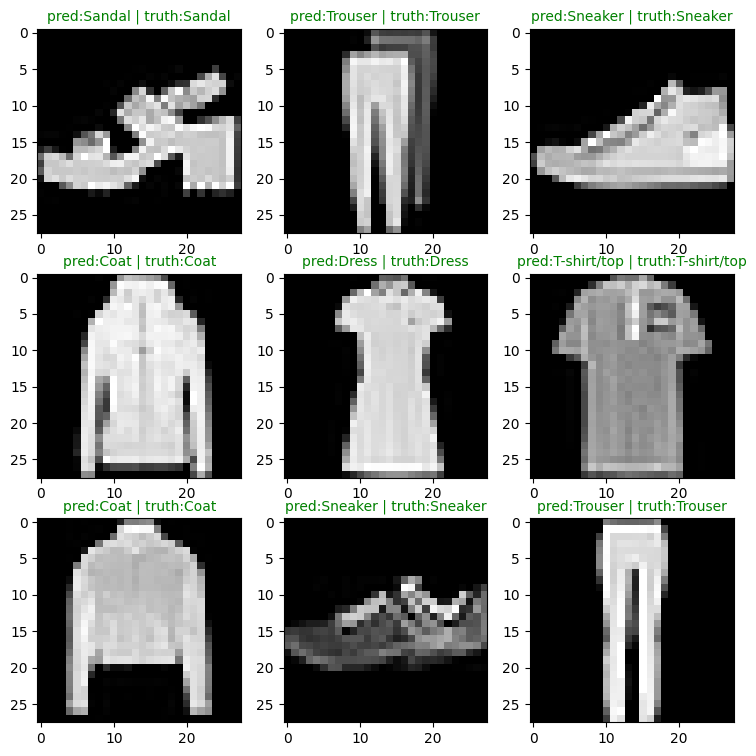

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))

rows = 3
columns = 3

for i , sample in enumerate(test_samples):
    plt.subplot(rows,columns,i+1)
    plt.imshow(sample.squeeze(),cmap="grey")
    pred_label = train_data_classes[argmax_prediction[i]]
    truth_label = train_data_classes[test_labels[i]]
    title_text = f"pred:{pred_label} | truth:{truth_label}"

    if pred_label==truth_label:
        plt.title(title_text,fontsize=10,c="g")
    else :
        plt.title(title_text,fontsize=10,c="r")

#### Lets make a Confusion Matrices

Three steps for making confusion matrics

1. Make predictions with our trained model, model_2 (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using torchmetrics.ConfusionMatrix.
3. Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix().

In [57]:
# Make predictions
from tqdm.auto import tqdm

model_3 = model_3.to(device)

y_preds = []
for X,y in tqdm(test_data_loader, desc="Making Predictions"):
    X , y = X.to(device) , y.to(device)

    y_logits = model_3(X)

    y_pred_softmax = torch.softmax(y_logits,dim=1)

    y_pred_argmax = torch.argmax(y_pred_softmax,dim=1)

    y_preds.append(y_pred_argmax)

y_pred_tensor = torch.cat(y_preds)



Making Predictions: 100%|██████████| 313/313 [00:01<00:00, 249.10it/s]


In [59]:
import mlxtend , torchmetrics

print(f"mlxtend version : {mlxtend.__version__}")

mlxtend version : 0.23.4


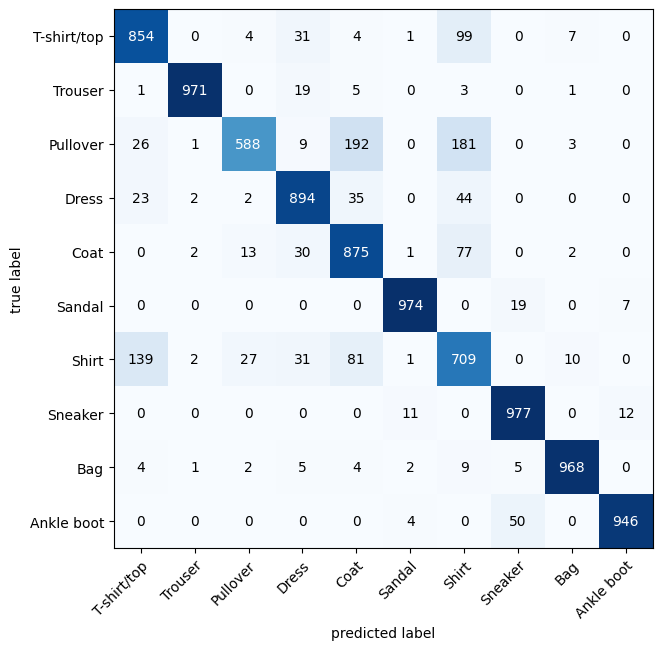

In [65]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import  plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(train_data_classes),task="multiclass").to(device)
confmat_tensor = confmat(preds = y_pred_tensor.to(device),
                         target= test_data.targets.to(device))

fig,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.cpu().numpy(),
    class_names=train_data_classes,
    figsize=(10,7)
)

### Let's Save a model's state dict and Load a model

In [68]:
from pathlib import Path

Model_Path = Path("models")
Model_Path.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_3.pth"
MODEL_SAVE_PATH = Model_Path / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_3.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_3.pth


In [73]:
loaded_model_3 = ConvolutionalNN(input_units=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_units=10) 

# Load in the saved state_dict()
loaded_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_3 = loaded_model_3.to(device)

In [78]:
torch.manual_seed(42)

loaded_model_3_results = eval_model(
    model=loaded_model_3,
    data_loader=test_data_loader,
    loss_fn=loss
)

loaded_model_3_results

{'model_name': 'ConvolutionalNN',
 'model_loss': 0.35013139247894287,
 'model_acc': 86.96601104736328}